In [1]:
import sympy as sp

In [2]:
s, z, T, kp, ki = sp.symbols('s, z, T, kp, ki')

In [3]:
# erro nulo
# ta = 0.5s
# So < 10%
# sugestão PI

g = 1/(s+7)
g

1/(s + 7)

In [4]:
c = (kp + ki/s)
c

ki/s + kp

In [5]:
u = (g*c/(1+g*c)).simplify().expand().simplify()
u

(ki + kp*s)/(ki + kp*s + s**2 + 7*s)

In [78]:
nom = [kp, ki]
nom

[kp, ki]

In [79]:
den = [1, kp+7, ki]
den

[1, kp + 7, ki]

In [6]:
from college_crap_lib.ctrl.control_ii import rutiruti_jury, get_ta_so_ereg

In [7]:
rutiruti_jury([1, kp+7, ki])

[ki, (-ki*(kp + 7) + kp + 7)/(1 - ki**2)]

In [8]:
csi, wn = sp.symbols('csi, wn')
csi = 0.7
sol =  sp.solve(0.5 - (4.8 / (csi * wn)), wn)
display(sol)
wn = sol[0]
print(f'{csi=}, {wn=}')

[13.7142857142857]

csi=0.7, wn=13.7142857142857


In [9]:
from copy import copy

In [10]:
sol = sp.solve([
    kp+7 - 2*csi*wn,
    ki - wn**2,
], (kp, ki))
display(sol)

tf = copy(u)

for var, val in sol.items():
    tf = tf.replace(var, val)
tf

{kp: 12.2000000000000, ki: 188.081632653061}

(12.2*s + 188.081632653061)/(s**2 + 19.2*s + 188.081632653061)

In [11]:
get_ta_so_ereg([[12.2, 188.08163], [1, 19.2, 188.08163]])

[[12.2, 188.08163], [1, 19.2, 188.08163]]


{'ta': 9.600000000000001, 'So': 0.6014532822230392, 'ereg': 0.0}

In [17]:
import control
import matplotlib.pyplot as plt
import pandas as pd

<AxesSubplot: >

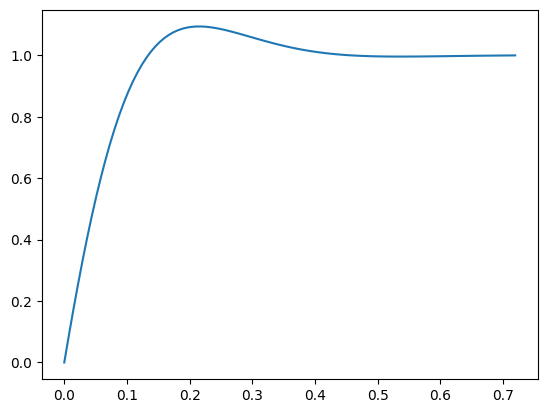

In [38]:
s = pd.Series(*reversed([*control.step_response(control.tf([12.2, 188.08163], [1, 19.2, 188.08163]))]))
s.plot()

In [14]:
from piv.result_verification import get_vreg


In [50]:
get_vreg(s, delta=0.02)

(0.3779495733449823, 0.9998882789305504)

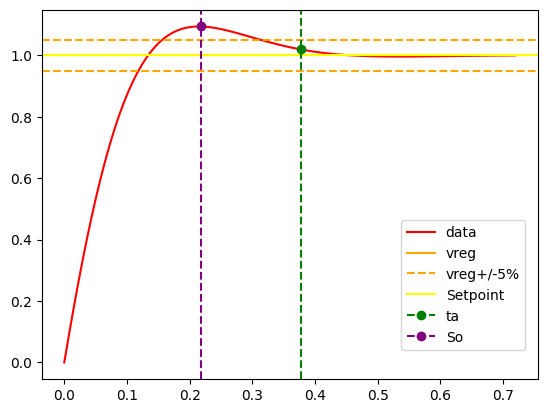

,Setpoint,ta,vreg,ereg,ereg%,So,So%
0,1,0.37795,0.999888,-0.000112,-0.0112%,0.093741,9.3752%




--------------------------------------------




In [61]:
ta, vreg = get_vreg(s, delta=0.02)
s.plot(color='red', label="data")

# info.get('lin_data').plot(color="blue", label="lindata")

plt.axhline(y=vreg, color='orange', label="vreg")
plt.axhline(y=vreg*1.05, color='orange', linestyle='--', label="vreg+/-5%")
plt.axhline(y=vreg*0.95, color='orange', linestyle='--')

plt.axhline(y=1, color='yellow', linestyle='-', label="Setpoint")

pd.Series((s[ta], ), (ta, )).plot(color="green", label="ta", linestyle='--', marker='o')
plt.axvline(x=ta, color='green', linestyle='--')
pd.Series((s.max(), ), (s.index[s.argmax()], )).plot(color="purple", label="So", linestyle='--', marker='o')
plt.axvline(x=s.index[s.argmax()], color='purple', linestyle='--')

plt.legend(bbox_to_anchor = (.85, 0.45), loc = 'upper center')
plt.show()
only_indicators_di = {
    'Setpoint': [1],
    'ta': [ta],
    'vreg': [vreg],
    'ereg': [vreg-1],
    'ereg%': [str(round((100*vreg/1)-100, 4)) + '%'],
    'So': [s.max()-vreg],
    'So%': [str(round((100*s.max()/vreg)-100, 4)) + '%'],
}
display(pd.DataFrame(only_indicators_di))
print("\n\n--------------------------------------------\n\n")

In [86]:
def get_range_of_values(base_val, rang, variance=0.1):
    val_var = base_val*variance
    step = val_var/rang
    start = base_val-val_var/2
    li = []
    for r in range(rang):
        li.append(start+step*r)
    return li

In [109]:
sol
data = {
    'kp': [],
    'ki': [],
    'ta': [],
    'ereg': [],
    'So': [],
}
for kp_subs in get_range_of_values(2.475, 10, variance=0.01):
    for ki_subs in get_range_of_values(34.32, 10, variance=0.01):
        data['kp'].append(kp_subs)
        data['ki'].append(ki_subs)

        new_nom = []
        new_den = []
        for n, new_n in zip([nom, den], [new_nom, new_den]):
            for value in n:
                for k_var, k_val in {kp: kp_subs, ki: ki_subs}.items():
                    if not isinstance(value, int) and not isinstance(value, float):
                        value = value.replace(k_var, k_val)
                new_n.append(float(value))
        # print(new_nom)
        # print(new_den)
        # print('------')
        ser = pd.Series(*reversed([*control.step_response(control.tf(new_nom, new_den))]))
        ta, vreg = get_vreg(
            ser,
            delta=0.05
        )
        data['ta'].append(ta)
        data['ereg'].append(vreg-1)
        data['So'].append(ser.max()-vreg)
result = pd.DataFrame(data)
result

,kp,ki,ta,ereg,So
0,2.462625,34.14840,0.516165,0.004230,0.010920
1,2.462625,34.18272,0.516165,0.004301,0.010940
2,2.462625,34.21704,0.501417,0.003602,0.011731
3,2.462625,34.25136,0.501417,0.003676,0.011748
4,2.462625,34.28568,0.501417,0.003750,0.011764
...,...,...,...,...,...
95,2.484900,34.32000,0.500239,0.003535,0.011680
96,2.484900,34.35432,0.500239,0.003609,0.011696
97,2.484900,34.38864,0.500239,0.003683,0.011712
98,2.484900,34.42296,0.500239,0.003757,0.011728
